In [312]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression,  Lasso, Ridge,ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA



In [313]:
# Read the 'application_record.csv' file
df = pd.read_csv('https://raw.githubusercontent.com/sriku2412/Creditcard-prediction/main/application_record.csv')

# Read the 'credit_record.csv' file
record = pd.read_csv('https://raw.githubusercontent.com/sriku2412/Creditcard-prediction/main/credit_record.csv')


# Data Cleaning 

In [314]:
print(record.shape)

# looking at a sample dataset 
record.sample(5)

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
511490,5061475,-12,0
477979,5059936,-29,0
577061,5068126,-33,C
370282,5041950,-5,C
1004033,5145718,-28,C


In [315]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

no missing values

In [316]:
df.describe(include = 'all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


According to what we got from this table, we can conclude the following points:

Gender: Two unique genders, with "Female" (F) being the most frequent.

Car Ownership: Majority own a car, with "Yes" (Y) being the most common.

Realty Ownership: Majority own real estate, with "Yes" (Y) being the most common.

Children: On average, there are less than one child per household (mean = 0.43).

Income: The mean income is approximately $187,524, with a standard deviation of $110,086.

Income Type: There are five unique income types, with "Working" as the most common.

Education: Five unique education types, with "Secondary / secondary special" as the most frequent.

Family Status: "Married" is the most common family status.

Housing Type: "House / apartment" is the most common housing type.

Age:  The "DAYS_BIRTH" column represents the number of days since the individual's birth. The average age is around 44(43.8) years.

Employment: The mean employment duration is around 60,563 days, potentially indicating outliers.

Contact Info: Binary flags for mobile phone, work phone, regular phone, and email.

Occupation: 18 unique occupation categories, NaN value exists.

Family Members: On average, there are slightly more than two family members per household (mean = 2.19).


### Data Cleaning

In [317]:
# We can use a simple filter to check if there is missing data (NaN) in the "ID" column
df[df['ID'].isnull()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


In [318]:
record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [319]:
df.set_index('ID', inplace=True)

In [320]:
df.sample(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
6370464,M,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15329,-852,1,0,0,0,NaN,2.0
6240942,F,N,Y,2,162000.0,Working,Secondary / secondary special,Married,House / apartment,-11805,-2369,1,0,0,0,Sales staff,4.0
6793888,F,N,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16792,-536,1,0,1,0,Laborers,3.0
5542002,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-20441,365243,1,0,0,0,NaN,2.0
6280832,F,Y,Y,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-15589,-4931,1,1,0,0,NaN,3.0


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438557 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   CNT_CHILDREN         438557 non-null  int64  
 4   AMT_INCOME_TOTAL     438557 non-null  float64
 5   NAME_INCOME_TYPE     438557 non-null  object 
 6   NAME_EDUCATION_TYPE  438557 non-null  object 
 7   NAME_FAMILY_STATUS   438557 non-null  object 
 8   NAME_HOUSING_TYPE    438557 non-null  object 
 9   DAYS_BIRTH           438557 non-null  int64  
 10  DAYS_EMPLOYED        438557 non-null  int64  
 11  FLAG_MOBIL           438557 non-null  int64  
 12  FLAG_WORK_PHONE      438557 non-null  int64  
 13  FLAG_PHONE           438557 non-null  int64  
 14  FLAG_EMAIL           438557 non-null  int64  
 15  OCCUPATION_TYPE

In [322]:
df.isna().any()
#only column "OCCUPATION_TYPE " includes Null value

CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [323]:
nan_count_in_column = df["OCCUPATION_TYPE"].isna().sum()
nan_count_in_column
#We can find there is 31% of occupancy type is NaN

134203

In [324]:
column_name = 'OCCUPATION_TYPE'
distinct_values = df[column_name].unique()
distinct_values

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [325]:
column_name2 = 'NAME_INCOME_TYPE'
distinct_values2 = df[column_name2].unique()
distinct_values2

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [326]:
df['OCCUPATION_TYPE'].fillna('undetermine', inplace=True)# fill NaN with undetermine

In [327]:
df_test = df.copy()

In [328]:
df_test.groupby('OCCUPATION_TYPE').describe()

CNT_CHILDREN                                           
                             count      mean       std  min  25%  50%  75%   
OCCUPATION_TYPE                                                              
Accountants                15985.0  0.495715  0.740892  0.0  0.0  0.0  1.0  \
Cleaning staff              5845.0  0.353122  0.769583  0.0  0.0  0.0  0.0   
Cooking staff               8076.0  0.476721  0.747390  0.0  0.0  0.0  1.0   
Core staff                 43007.0  0.554491  0.776073  0.0  0.0  0.0  1.0   
Drivers                    26090.0  0.555424  0.816348  0.0  0.0  0.0  1.0   
HR staff                     774.0  0.325581  0.599648  0.0  0.0  0.0  1.0   
High skill tech staff      17289.0  0.473654  0.738331  0.0  0.0  0.0  1.0   
IT staff                     604.0  0.322848  0.606822  0.0  0.0  0.0  0.0   
Laborers                   78240.0  0.528131  0.778043  0.0  0.0  0.0  1.0   
Low-skill Laborers          2140.0  0.465888  0.749789  0.0  0.0  0.0  1.0   
Managers                   35487.0  0.499901  0.746589  0.0  0.0  0.0  1.0   
Medicine staff             13520.0  0.453846  0.736202  0.0  0.0  0.0  1.0   
Private service staff       3456.0  0.549479  0.733238  0.0  0.0  0.0  1.0   
Realty agents               1041.0  0.537944  0.770084  0.0  0.0  0.0  1.0   
Sales staff                41098.0  0.506594  0.751582  0.0  0.0  0.0  1.0   
Secretaries                 2044.0  0.467710  0.704113  0.0  0.0  0.0  1.0   
Security staff              7993.0  0.424997  0.722795  0.0  0.0  0.0  1.0   
Waiters/barmen staff        1665.0  0.528529  0.894325  0.0  0.0  0.0  1.0   
undetermine               134203.0  0.237826  0.579992  0.0  0.0  0.0  0.0   

                            AMT_INCOME_TOTAL                 ... FLAG_EMAIL   
                        max            count           mean  ...        75%   
OCCUPATION_TYPE                                              ...              
Accountants             4.0          15985.0  215137.274977  ...        0.0  \
Cleaning staff          7.0           5845.0  147064.463815  ...        0.0   
Cooking staff           4.0           8076.0  155848.425334  ...        0.0   
Core staff             12.0          43007.0  190905.844378  ...        0.0   
Drivers                14.0          26090.0  202065.242047  ...        0.0   
HR staff                3.0            774.0  203620.686047  ...        0.0   
High skill tech staff   4.0          17289.0  195712.011010  ...        0.0   
IT staff                2.0            604.0  210958.733444  ...        0.0   
Laborers                5.0          78240.0  179865.810449  ...        0.0   
Low-skill Laborers      5.0           2140.0  150334.309346  ...        0.0   
Managers                5.0          35487.0  282125.938701  ...        0.0   
Medicine staff          4.0          13520.0  168102.197707  ...        0.0   
Private service staff   3.0           3456.0  201600.651042  ...        0.0   
Realty agents           3.0           1041.0  223510.806916  ...        0.0   
Sales staff             5.0          41098.0  170912.759267  ...        0.0   
Secretaries             3.0           2044.0  169456.878669  ...        0.0   
Security staff          5.0           7993.0  169835.113662  ...        0.0   
Waiters/barmen staff   19.0           1665.0  158796.621622  ...        0.0   
undetermine             6.0         134203.0  170869.803331  ...        0.0   

                           CNT_FAM_MEMBERS                                      
                       max           count      mean       std  min  25%  50%   
OCCUPATION_TYPE                                                                 
Accountants            1.0         15985.0  2.262871  0.911959  1.0  2.0  2.0  \
Cleaning staff         1.0          5845.0  2.069632  0.936069  1.0  2.0  2.0   
Cooking staff          1.0          8076.0  2.247400  0.897999  1.0  2.0  2.0   
Core staff             1.0         43007.0  2.337061  0.942617  1.0  2.0  2.0   

#### Outliers

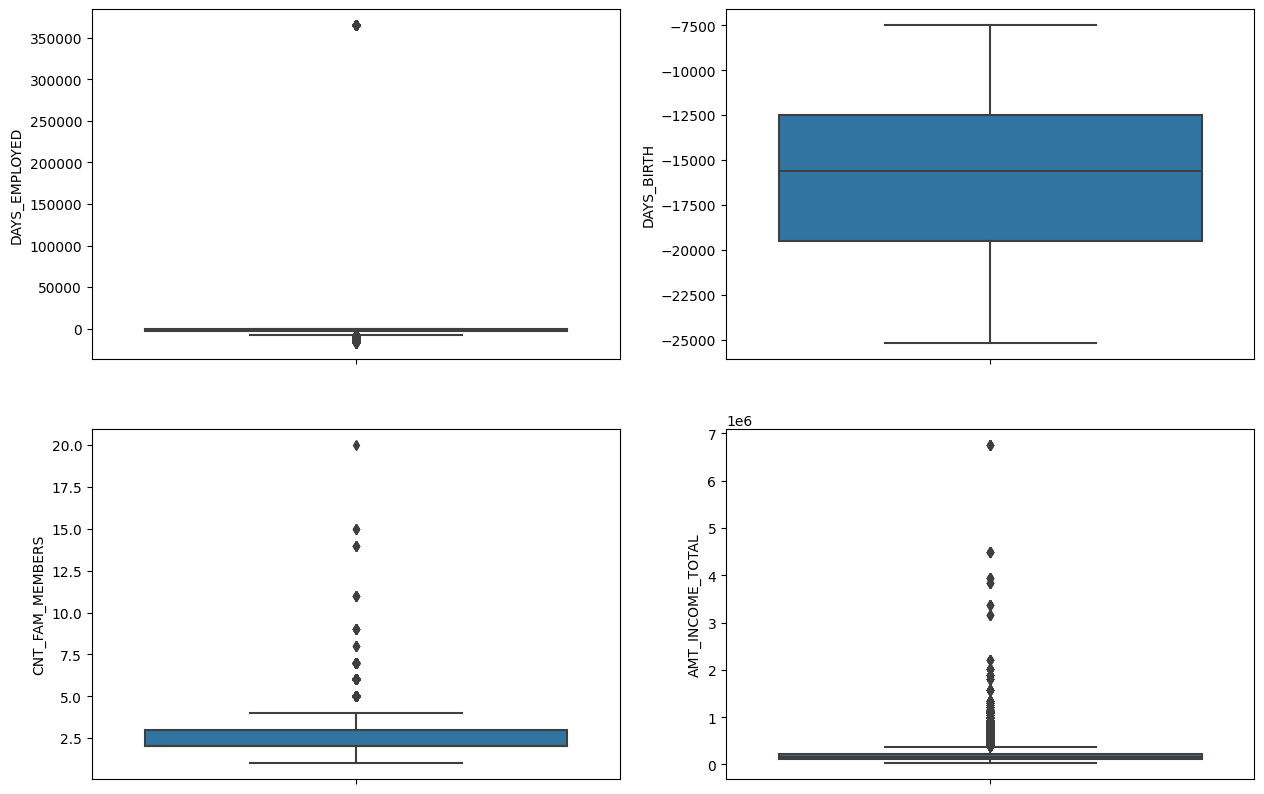

In [329]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df, y='DAYS_EMPLOYED', ax=ax1)
sns.boxplot(data=df, y='DAYS_BIRTH', ax=ax2)
sns.boxplot(data=df, y='CNT_FAM_MEMBERS', ax=ax3)
sns.boxplot(data=df, y='AMT_INCOME_TOTAL', ax=ax4)
plt.show()

In [330]:
# Find index values of observations above 50000
drop_employ_outliers = df[df['DAYS_EMPLOYED']>50000].index

In [331]:
df.drop(drop_employ_outliers, inplace=True)

In [332]:
# Find index values of observations above 4
drop_fam_outliers = df[df['CNT_FAM_MEMBERS']>8].index
df.drop(drop_fam_outliers, inplace=True)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363191 entries, 5008804 to 6842885
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          363191 non-null  object 
 1   FLAG_OWN_CAR         363191 non-null  object 
 2   FLAG_OWN_REALTY      363191 non-null  object 
 3   CNT_CHILDREN         363191 non-null  int64  
 4   AMT_INCOME_TOTAL     363191 non-null  float64
 5   NAME_INCOME_TYPE     363191 non-null  object 
 6   NAME_EDUCATION_TYPE  363191 non-null  object 
 7   NAME_FAMILY_STATUS   363191 non-null  object 
 8   NAME_HOUSING_TYPE    363191 non-null  object 
 9   DAYS_BIRTH           363191 non-null  int64  
 10  DAYS_EMPLOYED        363191 non-null  int64  
 11  FLAG_MOBIL           363191 non-null  int64  
 12  FLAG_WORK_PHONE      363191 non-null  int64  
 13  FLAG_PHONE           363191 non-null  int64  
 14  FLAG_EMAIL           363191 non-null  int64  
 15  OCCUPATION_TYPE

In [334]:
# Find index values of observations above 2500000
drop_income_outliers = df[df['AMT_INCOME_TOTAL']>2500000].index
drop_income_outliers

Index([5163386, 5163387, 5163388, 5163389, 5163390, 5584874, 5680511, 5680512,
       5680513, 5680514, 5680516, 5918977, 5873449, 5873450, 5873451, 5873452,
       6071071, 5987963, 5987964, 5987966, 5987967, 5987968, 5987969, 6123707,
       6123708, 6123709, 6123710, 6123713, 6123714, 6123715, 6272042, 6272043,
       6272044, 6544043, 6544044, 6544045, 6544046, 6544047, 7987964, 7873452],
      dtype='int64', name='ID')

In [335]:
df.drop(drop_income_outliers, inplace=True)

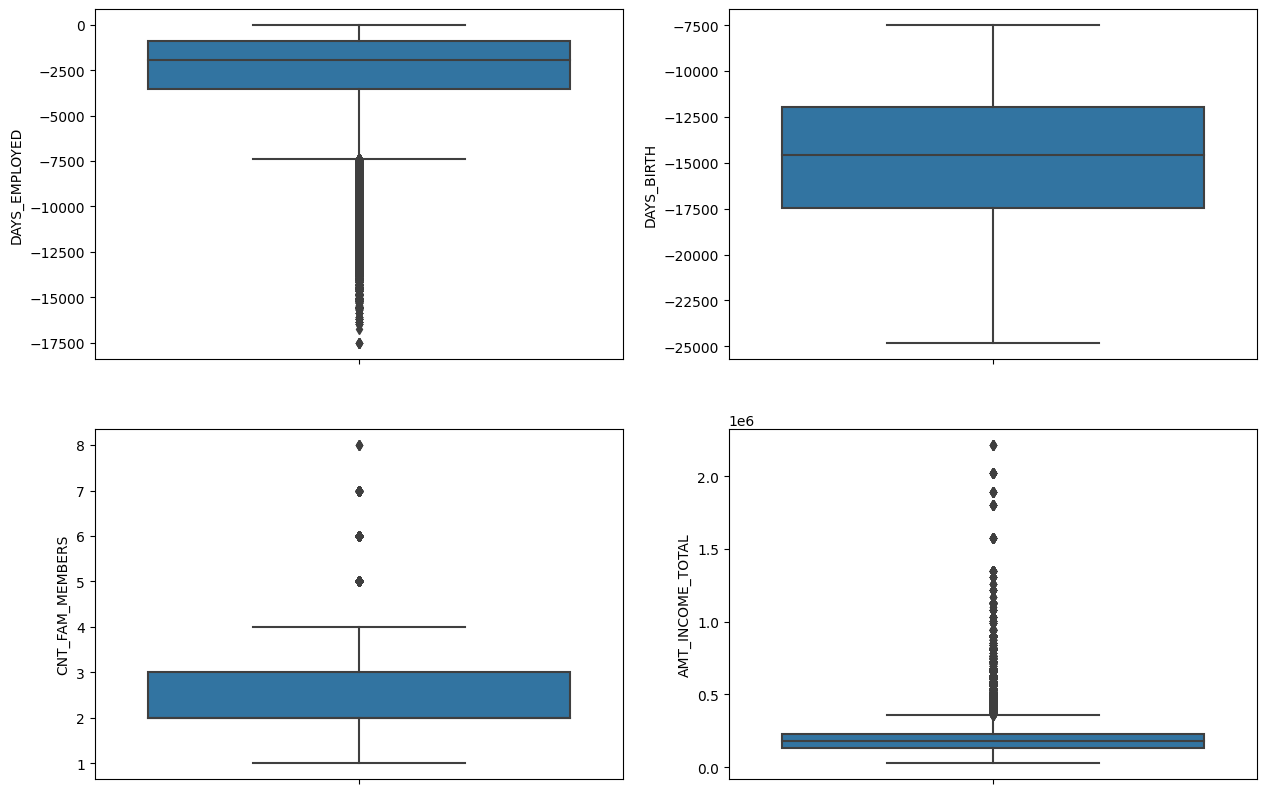

In [336]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df, y='DAYS_EMPLOYED', ax=ax1)
sns.boxplot(data=df, y='DAYS_BIRTH', ax=ax2)
sns.boxplot(data=df, y='CNT_FAM_MEMBERS', ax=ax3)
sns.boxplot(data=df, y='AMT_INCOME_TOTAL', ax=ax4)
plt.show()


In [337]:
df.reset_index(inplace=True)

In [338]:
#let's drop any duplicate entries.
df.drop_duplicates(inplace=True)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363151 entries, 0 to 363150
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   363151 non-null  int64  
 1   CODE_GENDER          363151 non-null  object 
 2   FLAG_OWN_CAR         363151 non-null  object 
 3   FLAG_OWN_REALTY      363151 non-null  object 
 4   CNT_CHILDREN         363151 non-null  int64  
 5   AMT_INCOME_TOTAL     363151 non-null  float64
 6   NAME_INCOME_TYPE     363151 non-null  object 
 7   NAME_EDUCATION_TYPE  363151 non-null  object 
 8   NAME_FAMILY_STATUS   363151 non-null  object 
 9   NAME_HOUSING_TYPE    363151 non-null  object 
 10  DAYS_BIRTH           363151 non-null  int64  
 11  DAYS_EMPLOYED        363151 non-null  int64  
 12  FLAG_MOBIL           363151 non-null  int64  
 13  FLAG_WORK_PHONE      363151 non-null  int64  
 14  FLAG_PHONE           363151 non-null  int64  
 15  FLAG_EMAIL       

In [340]:
#let's drop any duplicate entries.
record.drop_duplicates(inplace=True)

<Axes: xlabel='DAYS_EMPLOYED', ylabel='Count'>

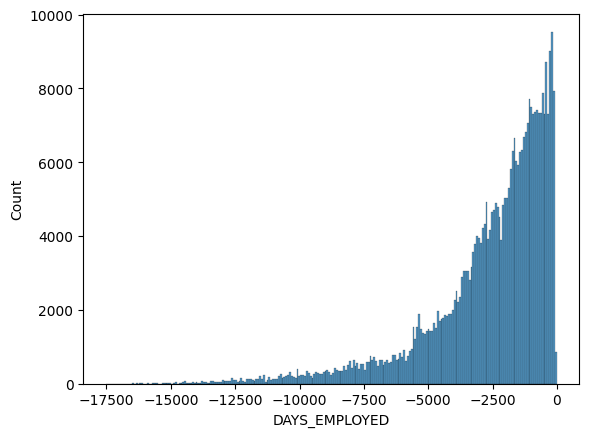

In [341]:
sns.histplot(df['DAYS_EMPLOYED'])

<Axes: xlabel='DAYS_BIRTH', ylabel='Count'>

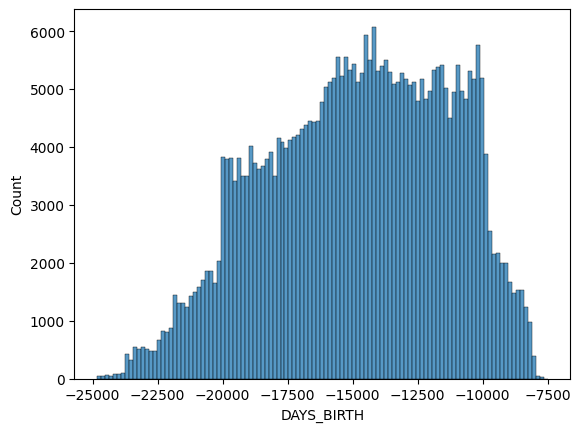

In [342]:
sns.histplot(df['DAYS_BIRTH'])

<Axes: xlabel='OCCUPATION_TYPE'>

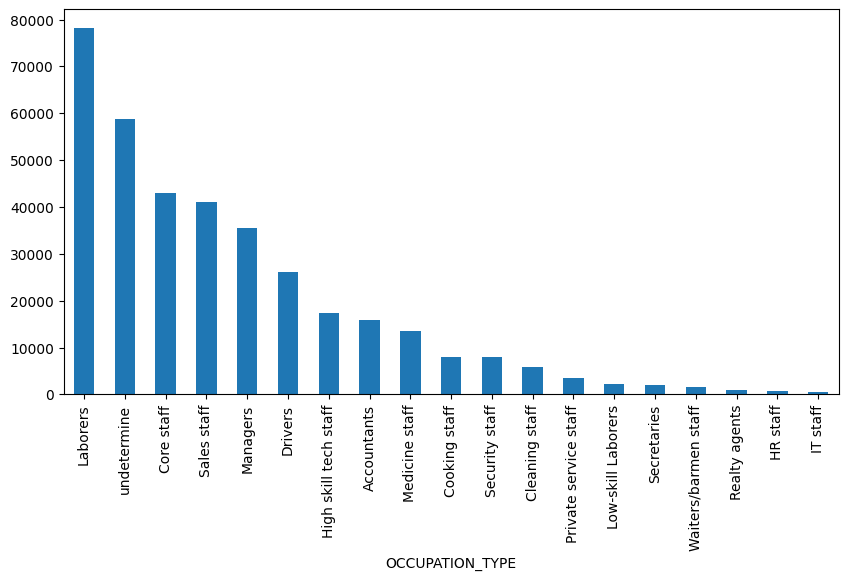

In [343]:
df.groupby('OCCUPATION_TYPE')['DAYS_BIRTH'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='OCCUPATION_TYPE'>

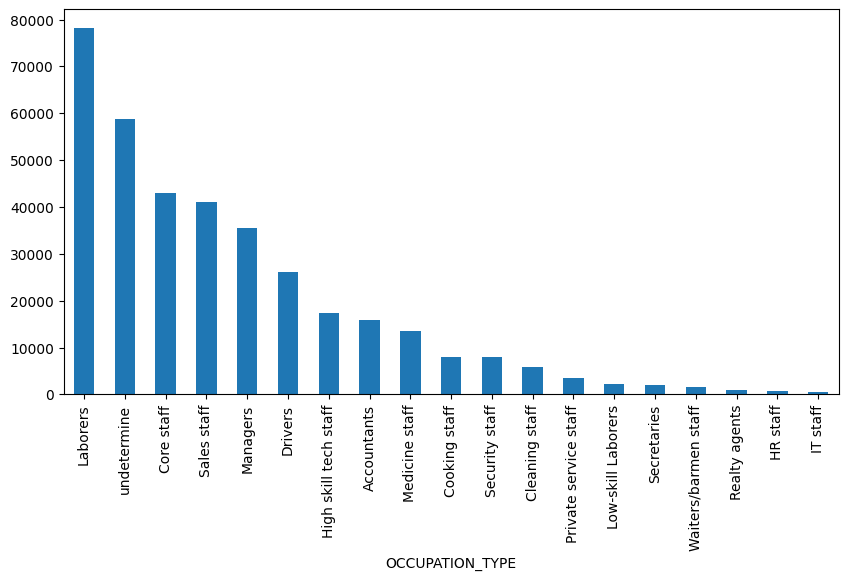

In [344]:
df.groupby('OCCUPATION_TYPE')['DAYS_EMPLOYED'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

We can see that Laborers has the highest number of days been employed and days of birth, followed by undetermine, sales staff and core staff. On the other hand, IT staff has the least number of days.

<Axes: xlabel='NAME_INCOME_TYPE'>

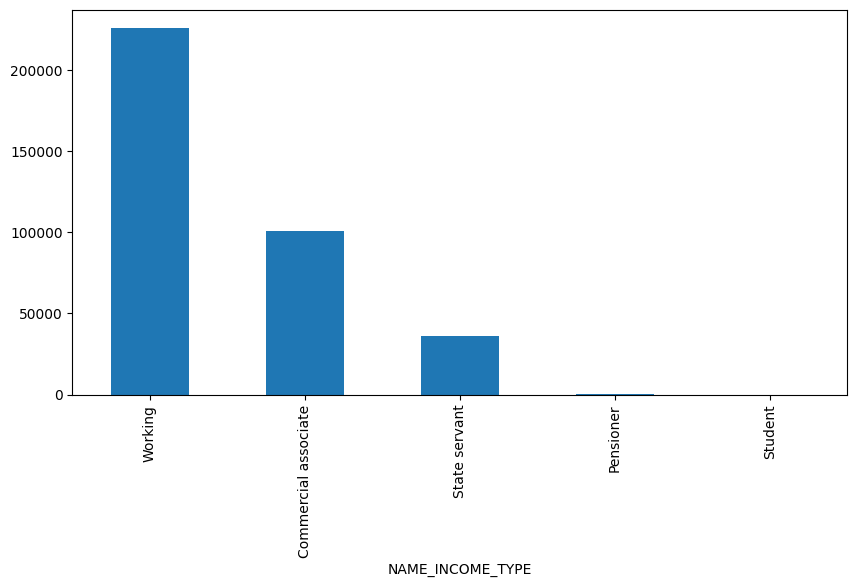

In [345]:
df.groupby('NAME_INCOME_TYPE')['DAYS_EMPLOYED'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

<Axes: xlabel='NAME_INCOME_TYPE'>

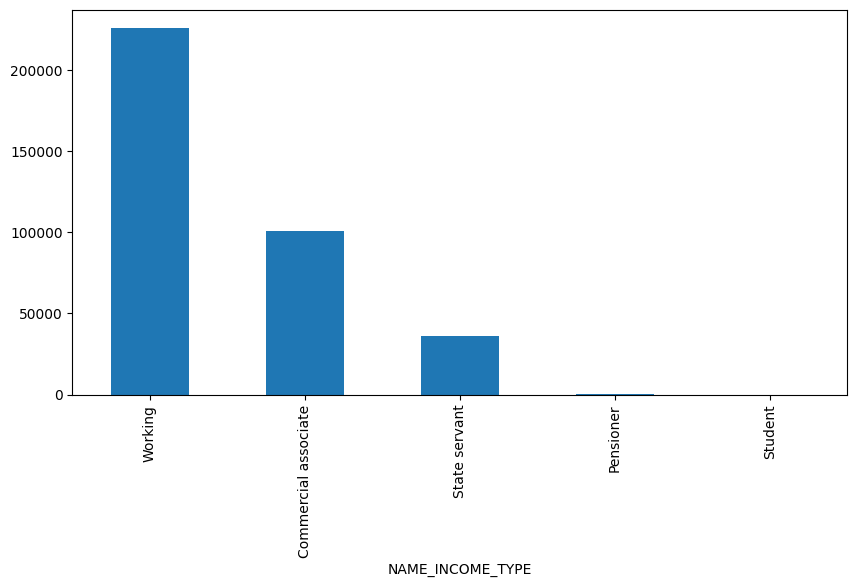

In [346]:
df.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

We can see that Workers has the highest number of days been employed and days of birth, followed by commercial associate. On the other hand, student has the least number of days.

In [347]:
units_by_type = df.groupby('NAME_INCOME_TYPE')['DAYS_BIRTH'].aggregate(['sum','mean','median','count'])
units_by_type

,sum,mean,median,count
NAME_INCOME_TYPE,,,,
Commercial associate,-1489476761,-14787.704628,-14596.0,100724
Pensioner,-2523504,-15387.219512,-15232.0,164
State servant,-544195937,-15040.931345,-14740.0,36181
Student,-247761,-14574.176471,-17264.0,17
Working,-3342552712,-14785.803694,-14544.0,226065


In [348]:
units_by_type2 = df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].aggregate(['sum','mean','median','count'])
units_by_type2

,sum,mean,median,count
NAME_INCOME_TYPE,,,,
Commercial associate,2.233915e+10,221785.750136,202500.0,100724
Pensioner,3.528926e+07,215178.420732,180000.0,164
State servant,7.254763e+09,200513.059893,180000.0,36181
Student,2.713500e+06,159617.647059,171000.0,17
Working,4.086717e+10,180776.209014,157500.0,226065


In [349]:
units_by_type3 = df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].aggregate(['sum','mean','median','count'])
units_by_type3

,sum,mean,median,count
OCCUPATION_TYPE,,,,
Accountants,3.438969e+09,215137.274977,184500.0,15985
Cleaning staff,8.586783e+08,147134.731151,135000.0,5836
Cooking staff,1.258632e+09,155848.425334,135000.0,8076
Core staff,8.208938e+09,190892.208664,171000.0,43003
Drivers,5.269542e+09,202045.249990,180000.0,26081
HR staff,1.576024e+08,203620.686047,180000.0,774
High skill tech staff,3.383170e+09,195706.019457,180000.0,17287
IT staff,1.274191e+08,210958.733444,180000.0,604
Laborers,1.402486e+10,179279.570358,157500.0,78229


## Feature Engineering

### Categorical Variable

In [350]:
df['CODE_GENDER'] = df['CODE_GENDER'].replace(["F","M"], ["1", "0"])
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(["Y", "N"],["1","0"])
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_CAR'].replace(["Y", "N"],["1","0"])

Transforming part of the categorical variable, 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY' into the nummerical variable, which are easier to interpret.

In [351]:
##Find the range of AMT_INCOME_TOTAL
df['AMT_INCOME_TOTAL'].describe()

count    3.631510e+05
mean     1.941316e+05
std      1.046841e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      2.214117e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [352]:
record.head(15)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [353]:
record.groupby('STATUS')['ID'].value_counts().unstack()

ID,5001711,5001712,5001713,5001714,5001715,5001717,5001718,5001719,5001720,5001723,...,5150477,5150478,5150479,5150480,5150481,5150482,5150483,5150484,5150485,5150487
STATUS,,,,,,,,,,,,,,,,,,,,,
0,3.0,10.0,NaN,NaN,NaN,17.0,24.0,2.0,29.0,8.0,...,17.0,NaN,NaN,6.0,NaN,12.0,NaN,12.0,2.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,9.0,NaN,NaN,NaN,5.0,3.0,41.0,NaN,NaN,...,NaN,6.0,1.0,20.0,NaN,6.0,NaN,1.0,NaN,30.0
X,1.0,NaN,22.0,15.0,60.0,NaN,10.0,NaN,NaN,23.0,...,4.0,8.0,8.0,NaN,43.0,NaN,18.0,NaN,NaN,NaN


In [354]:
record['MONTHS_BALANCE'] = abs(record['MONTHS_BALANCE'])
record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,25,C
1048571,5150487,26,C
1048572,5150487,27,C
1048573,5150487,28,C


In [355]:
record_1 = record.groupby('ID')['MONTHS_BALANCE'].max()
record = record.replace(['X','C'],[-1,-1])
record['STATUS'] = record['STATUS'].astype(int)
record_2 = record.groupby('ID')['STATUS'].max()
score_df=pd.merge(record_1, record_2, how='inner', on=['ID'])

In [356]:
score_df.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,3,0
5001712,18,0
5001713,21,-1
5001714,14,-1
5001715,59,-1


In [357]:
def month_score(x):
    if x >= 0 and x <= 2:
        return 6
    if x > 2 and x <= 4:
        return 5
    if x > 4 and x <= 8:
        return 4
    if x > 8 and x <= 12:
        return 3
    if x > 12 and x <= 24:
        return 2
    else:
        return 1

Since longer overdue duration and shorter record month of a client means higher probility of risk, we use STATUS_SCORE and MONTHS_SCORE to generate a "Total_score" to represent to level of risk
And apply a weighted score 50% for each of these factors 

In [358]:
# all the parameters used in the program
    # weights for total score 
MONTHS_SCORE_WEIGHT = 0.5
STATUS_SCORE_WEIGHT = 1-MONTHS_SCORE_WEIGHT

In [359]:
score_df['MONTHS_SCORE'] = score_df['MONTHS_BALANCE'].apply(month_score)
score_df['STATUS_SCORE'] = score_df['STATUS'] + 1
#since month score affect the risk lower, apply weighted score
score_df['TOTAL_SCORE'] = MONTHS_SCORE_WEIGHT*score_df['MONTHS_SCORE']+ (STATUS_SCORE_WEIGHT*score_df['STATUS_SCORE'])

In [360]:
score_df['STATUS_SCORE'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [361]:
#Merge two datasets
df=pd.merge(df, score_df, how='inner', on=['ID'])

In [362]:
df['DEFAULT'] = (df['STATUS'] == 5).astype(int)

### Continuous Variable

In [363]:
## Transform the wage into categorical
def wage_transformer(x):
    if x >= 27000 and x < 120000:
        return "Low wage"
    if x >= 120000 and x < 160000:
        return "Medium wage"
    if x >= 160000:
        return "High wage"

In [364]:
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(wage_transformer)

In [365]:
##Transforming days into years
df['AGE'] = abs(df['DAYS_BIRTH'])//365
df['WORK_YEAR'] = abs(df['DAYS_EMPLOYED'])//365

In [366]:
df.drop('DAYS_BIRTH', axis=1, inplace = True)

In [367]:
df.drop('DAYS_EMPLOYED', axis=1, inplace = True)

In [368]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,MONTHS_SCORE,STATUS_SCORE,TOTAL_SCORE,DEFAULT,AGE,WORK_YEAR
0,5008804,0,1,1,0,High wage,Working,Higher education,Civil marriage,Rented apartment,...,undetermine,2.0,15,1,2,2,2.0,0,32,12
1,5008805,0,1,1,0,High wage,Working,Higher education,Civil marriage,Rented apartment,...,undetermine,2.0,14,1,2,2,2.0,0,32,12
2,5008806,0,1,1,0,Low wage,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,29,0,1,1,1.0,0,58,3
3,5008808,1,0,0,0,High wage,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,4,0,5,1,3.0,0,52,8
4,5008809,1,0,0,0,High wage,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,26,-1,1,0,0.5,0,52,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30311,5149828,0,1,1,0,High wage,Working,Secondary / secondary special,Married,House / apartment,...,Managers,2.0,11,5,3,6,4.5,1,47,6
30312,5149834,1,0,0,0,Medium wage,Commercial associate,Higher education,Married,House / apartment,...,Medicine staff,2.0,23,5,2,6,4.0,1,33,3
30313,5149838,1,0,0,0,Medium wage,Pensioner,Higher education,Married,House / apartment,...,Medicine staff,2.0,32,5,1,6,3.5,1,33,3
30314,5150049,1,0,0,0,High wage,Working,Secondary / secondary special,Married,House / apartment,...,Sales staff,2.0,9,2,3,3,3.0,0,49,1


In [369]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,MONTHS_SCORE,STATUS_SCORE,TOTAL_SCORE,DEFAULT,AGE,WORK_YEAR
count,3.031600e+04,30316,30316,30316,30316.000000,30316,30316,30316,30316,30316,...,30316,30316.000000,30316.000000,30316.000000,30316.000000,30316.000000,30316.000000,30316.000000,30316.000000,30316.000000
unique,NaN,2,2,2,NaN,3,5,5,5,6,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1,0,0,NaN,High wage,Working,Secondary / secondary special,Married,House / apartment,...,Laborers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19192,17763,17763,NaN,15928,18813,19861,21135,26647,...,6211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.078949e+06,NaN,NaN,NaN,0.504849,NaN,NaN,NaN,NaN,NaN,...,NaN,2.287175,26.223281,0.034140,2.057395,1.034140,1.545768,0.004915,40.049050,6.751056
std,4.186887e+04,NaN,NaN,NaN,0.761135,NaN,NaN,NaN,NaN,NaN,...,NaN,0.926454,16.445252,0.646835,1.405183,0.646835,0.743264,0.069935,9.609726,6.469019
min,5.008804e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,-1.000000,1.000000,0.000000,0.500000,0.000000,20.000000,0.000000
25%,5.042319e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,32.000000,2.000000
50%,5.079020e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2.000000,24.000000,0.000000,2.000000,1.000000,1.500000,0.000000,39.000000,5.000000
75%,5.115609e+06,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,3.000000,39.000000,0.000000,3.000000,1.000000,2.000000,0.000000,47.000000,9.000000


# Model design

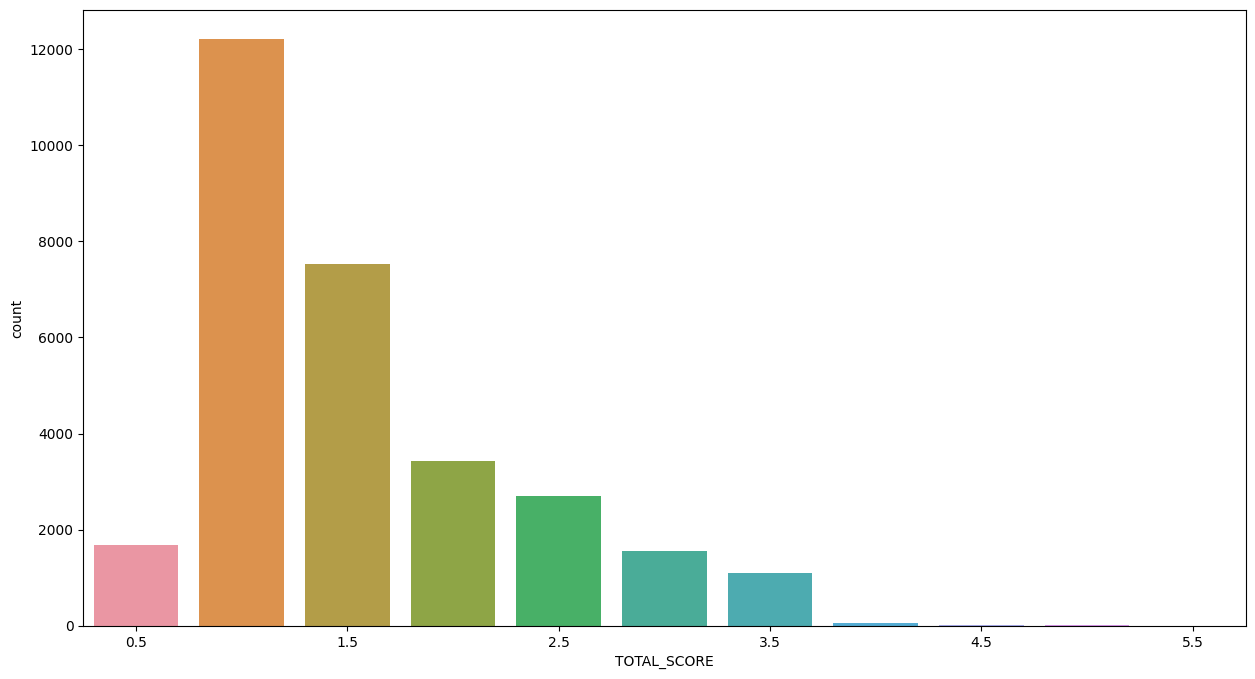

In [370]:
# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create the countplot
sns.countplot(x='TOTAL_SCORE', data=df)

# Set x-axis labels as integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Display the plot
plt.show()


Try Linear Regression with Total Score to predict the features contribute higher score

In [371]:
# List of columns for one-hot encoding (two-value variables)
two_value_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL']

# List of columns for label encoding (multiple value variables)
multiple_value_vars = ['TOTAL_SCORE','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

# Separate out the categorical variables
categorical_variables = df[two_value_vars + multiple_value_vars]

# One-hot encoding for two-value variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_encoded_vars = one_hot_encoder.fit_transform(categorical_variables[two_value_vars])

# Get the feature names after one-hot encoding
one_hot_encoded_feature_names = one_hot_encoder.get_feature_names_out(two_value_vars)

# Label encoding for multiple-value variables
label_encoder = LabelEncoder()
label_encoded_vars = categorical_variables[multiple_value_vars].apply(label_encoder.fit_transform)

# Align the indices of encoded categorical variables and label-encoded variables
encoded_categorical_vars = pd.get_dummies(categorical_variables[two_value_vars], drop_first=True).astype(int)
encoded_categorical_vars = encoded_categorical_vars.reindex(columns=one_hot_encoded_feature_names, fill_value=0)

# Combine encoded categorical variables with numerical variables
numerical_variables = df[['CNT_FAM_MEMBERS','CNT_CHILDREN', 'MONTHS_SCORE', 'AGE', 'WORK_YEAR']]
df_transfered = pd.concat([encoded_categorical_vars, label_encoded_vars, numerical_variables], axis=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [372]:
#through correlation see the relation between to choose best feature combination

corr = df_transfered.corr(numeric_only=True)
corr['TOTAL_SCORE'].sort_values(ascending=False).index

Index(['TOTAL_SCORE', 'MONTHS_SCORE', 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL',
       'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'CODE_GENDER_1', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'FLAG_OWN_CAR_1', 'FLAG_OWN_REALTY_1', 'AGE', 'WORK_YEAR',
       'FLAG_PHONE_1', 'FLAG_WORK_PHONE_1', 'FLAG_EMAIL_1'],
      dtype='object')

<Axes: >

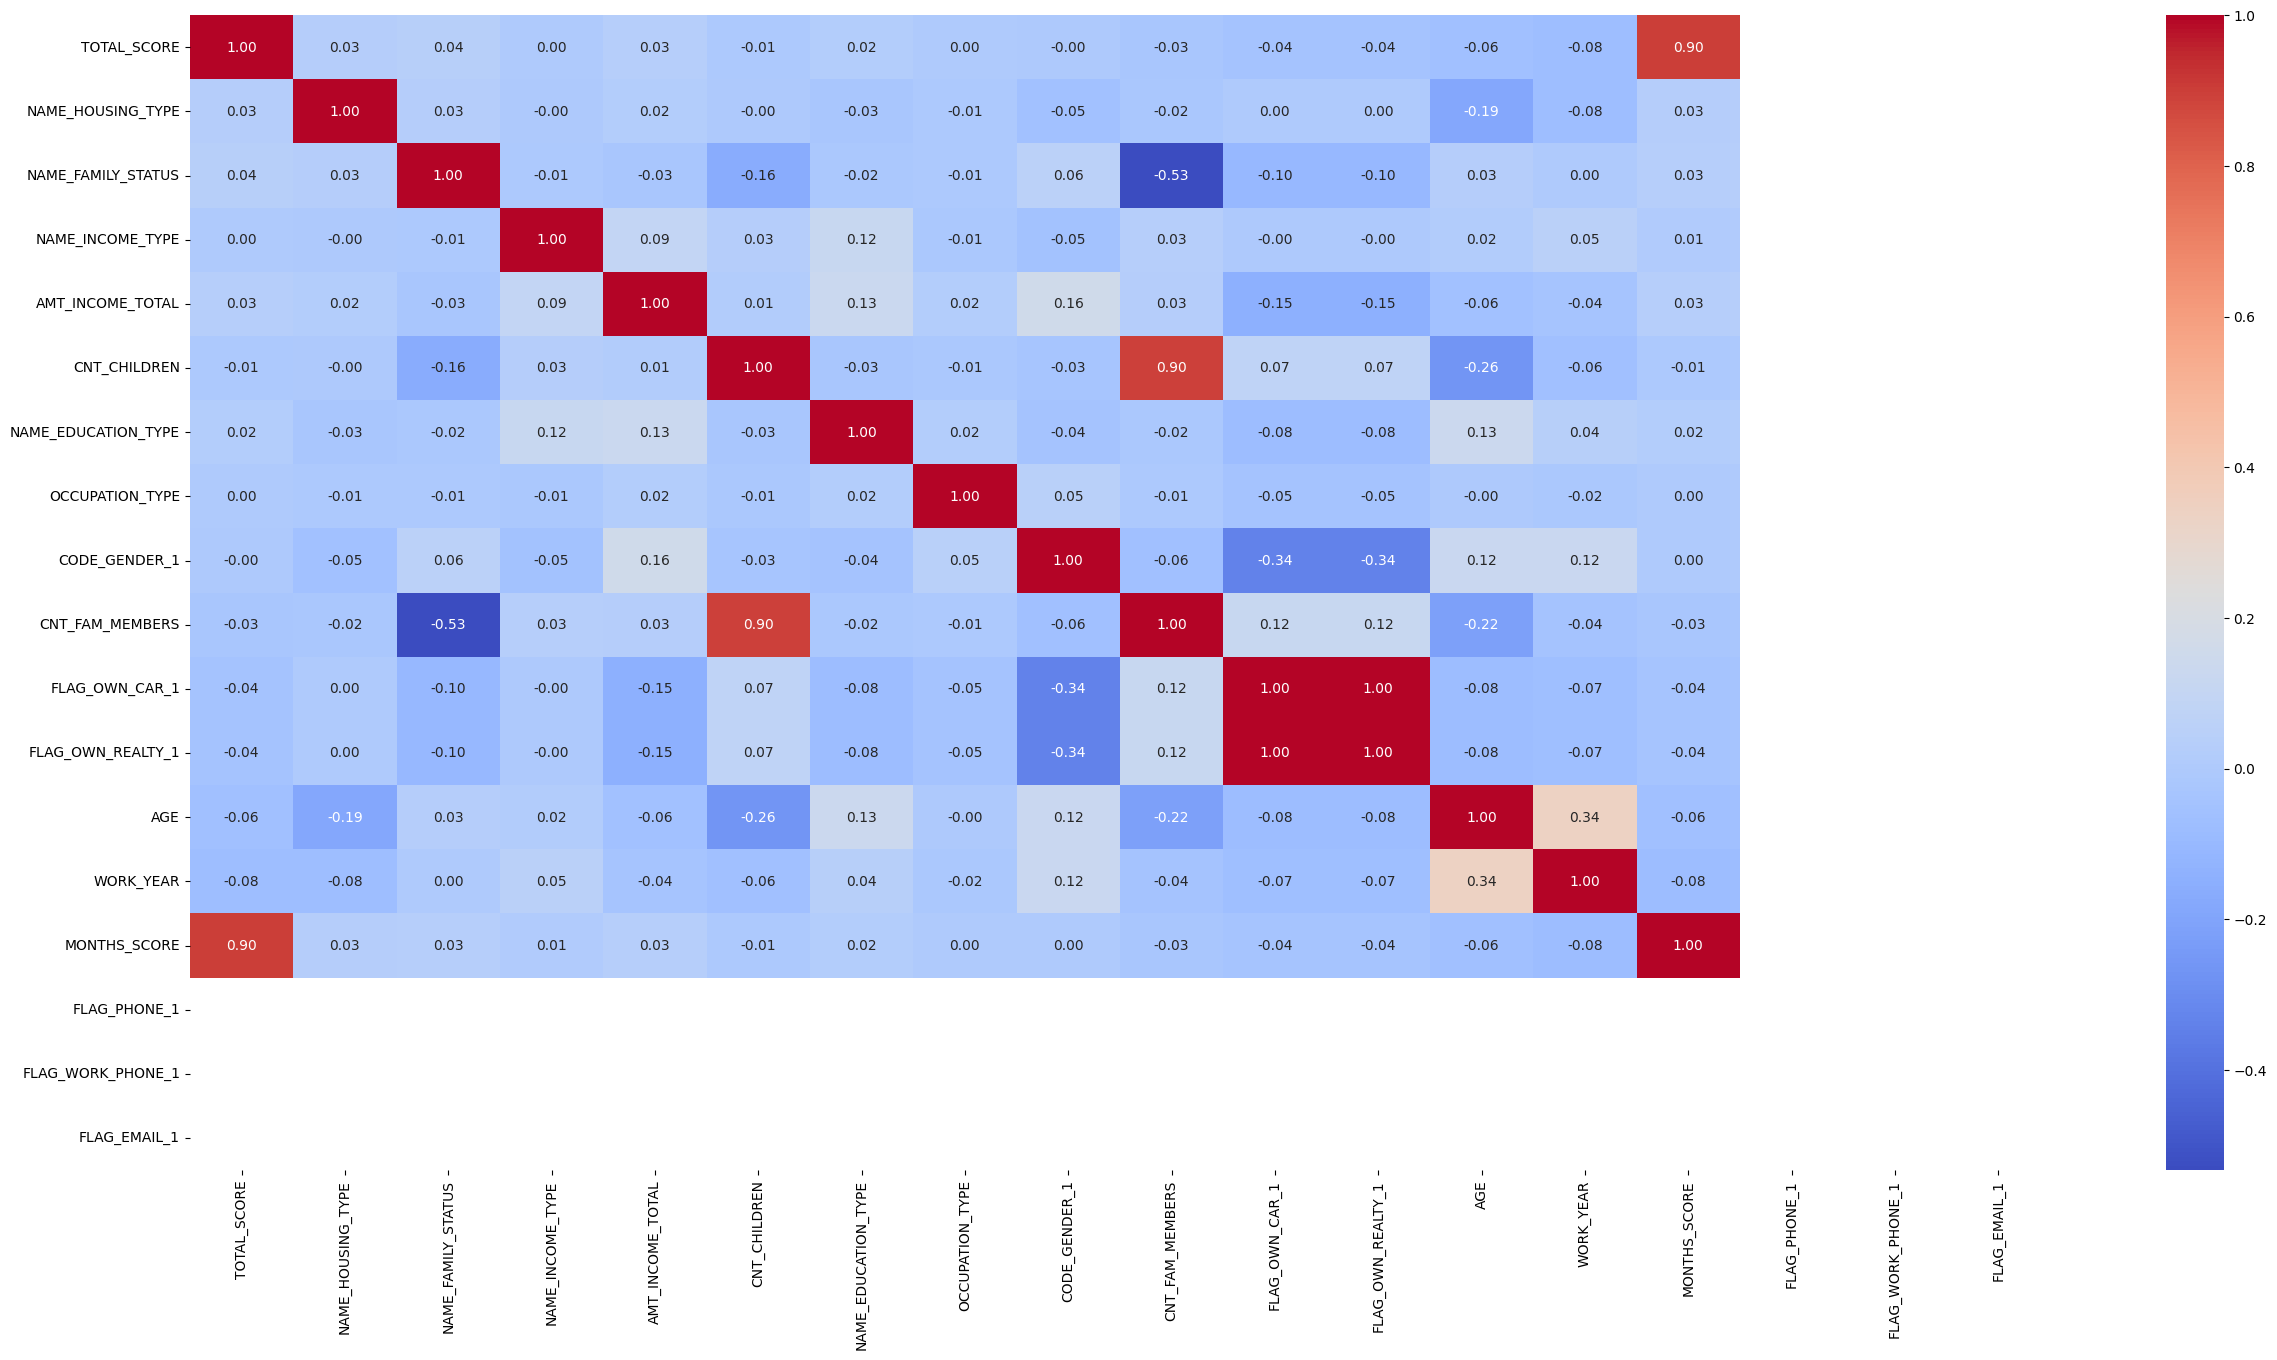

In [373]:
dfc=df_transfered[
    ['TOTAL_SCORE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER_1',
       'CNT_FAM_MEMBERS', 'FLAG_OWN_CAR_1', 'FLAG_OWN_REALTY_1', 'AGE',
       'WORK_YEAR', 'MONTHS_SCORE', 'FLAG_PHONE_1', 'FLAG_WORK_PHONE_1',
       'FLAG_EMAIL_1']
        ]
plt.figure(figsize=(30, 15))
sns.heatmap(dfc.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

seems extream low correlation between total score and other features(exept factor months score), continue to check OLS
Only when using month socre(already in total_score factor) the OLS could get high R Squraed score, so it's not good idea to build a regression model

In [374]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

results = ols("TOTAL_SCORE ~ MONTHS_SCORE", data=df_transfered).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_SCORE   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.314e+05
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:00:02   Log-Likelihood:                -29654.
No. Observations:               30316   AIC:                         5.931e+04
Df Residuals:                   30314   BIC:                         5.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1296      0.007     19.771   

In [375]:
results = ols("TOTAL_SCORE ~ AGE + WORK_YEAR + FLAG_OWN_CAR_1 + FLAG_OWN_REALTY_1", data=df_transfered).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_SCORE   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           5.60e-68
Time:                        14:00:02   Log-Likelihood:                -54877.
No. Observations:               30316   AIC:                         1.098e+05
Df Residuals:                   30312   BIC:                         1.098e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5442      0.03

So let's Try Classification

In [376]:
df['TOTAL_SCORE'].describe()

count    30316.000000
mean         1.545768
std          0.743264
min          0.500000
25%          1.000000
50%          1.500000
75%          2.000000
max          5.500000
Name: TOTAL_SCORE, dtype: float64

In [377]:
#transfer it to 3 categories: low, medium, high
def RISK_LEVEL(x):
    if x > 3:
        return 3
    if x >1 and x <= 3:
        return 2
    else:
        return 1

In [378]:
df['RISK_LEVEL'] = df['TOTAL_SCORE'].apply(RISK_LEVEL)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,MONTHS_SCORE,STATUS_SCORE,TOTAL_SCORE,DEFAULT,AGE,WORK_YEAR,RISK_LEVEL
0,5008804,0,1,1,0,High wage,Working,Higher education,Civil marriage,Rented apartment,...,2.0,15,1,2,2,2.0,0,32,12,2
1,5008805,0,1,1,0,High wage,Working,Higher education,Civil marriage,Rented apartment,...,2.0,14,1,2,2,2.0,0,32,12,2
2,5008806,0,1,1,0,Low wage,Working,Secondary / secondary special,Married,House / apartment,...,2.0,29,0,1,1,1.0,0,58,3,1
3,5008808,1,0,0,0,High wage,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,4,0,5,1,3.0,0,52,8,2
4,5008809,1,0,0,0,High wage,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1.0,26,-1,1,0,0.5,0,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30311,5149828,0,1,1,0,High wage,Working,Secondary / secondary special,Married,House / apartment,...,2.0,11,5,3,6,4.5,1,47,6,3
30312,5149834,1,0,0,0,Medium wage,Commercial associate,Higher education,Married,House / apartment,...,2.0,23,5,2,6,4.0,1,33,3,3
30313,5149838,1,0,0,0,Medium wage,Pensioner,Higher education,Married,House / apartment,...,2.0,32,5,1,6,3.5,1,33,3,3
30314,5150049,1,0,0,0,High wage,Working,Secondary / secondary special,Married,House / apartment,...,2.0,9,2,3,3,3.0,0,49,1,2


In [379]:
dfr = df['RISK_LEVEL'].value_counts().reset_index()
dfr.columns = ['RISK_LEVEL', 'COUNT']
total_records = len(df)
dfr['PERCENTAGE'] = (dfr['COUNT'] / total_records) * 100
dfr.head()


,RISK_LEVEL,COUNT,PERCENTAGE
0,2,15229,50.234200
1,1,13902,45.856973
2,3,1185,3.908827


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30316 entries, 0 to 30315
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30316 non-null  int64  
 1   CODE_GENDER          30316 non-null  object 
 2   FLAG_OWN_CAR         30316 non-null  object 
 3   FLAG_OWN_REALTY      30316 non-null  object 
 4   CNT_CHILDREN         30316 non-null  int64  
 5   AMT_INCOME_TOTAL     30316 non-null  object 
 6   NAME_INCOME_TYPE     30316 non-null  object 
 7   NAME_EDUCATION_TYPE  30316 non-null  object 
 8   NAME_FAMILY_STATUS   30316 non-null  object 
 9   NAME_HOUSING_TYPE    30316 non-null  object 
 10  FLAG_MOBIL           30316 non-null  int64  
 11  FLAG_WORK_PHONE      30316 non-null  int64  
 12  FLAG_PHONE           30316 non-null  int64  
 13  FLAG_EMAIL           30316 non-null  int64  
 14  OCCUPATION_TYPE      30316 non-null  object 
 15  CNT_FAM_MEMBERS      30316 non-null 

<Axes: xlabel='STATUS', ylabel='Count'>

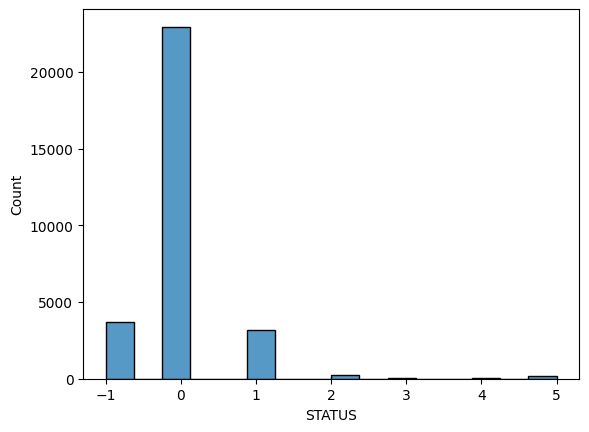

In [381]:
sns.histplot(x='STATUS', data=df)

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30316 entries, 0 to 30315
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   30316 non-null  int64  
 1   CODE_GENDER          30316 non-null  object 
 2   FLAG_OWN_CAR         30316 non-null  object 
 3   FLAG_OWN_REALTY      30316 non-null  object 
 4   CNT_CHILDREN         30316 non-null  int64  
 5   AMT_INCOME_TOTAL     30316 non-null  object 
 6   NAME_INCOME_TYPE     30316 non-null  object 
 7   NAME_EDUCATION_TYPE  30316 non-null  object 
 8   NAME_FAMILY_STATUS   30316 non-null  object 
 9   NAME_HOUSING_TYPE    30316 non-null  object 
 10  FLAG_MOBIL           30316 non-null  int64  
 11  FLAG_WORK_PHONE      30316 non-null  int64  
 12  FLAG_PHONE           30316 non-null  int64  
 13  FLAG_EMAIL           30316 non-null  int64  
 14  OCCUPATION_TYPE      30316 non-null  object 
 15  CNT_FAM_MEMBERS      30316 non-null 

In [383]:
df.groupby('STATUS').count()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,MONTHS_SCORE,STATUS_SCORE,TOTAL_SCORE,DEFAULT,AGE,WORK_YEAR,RISK_LEVEL
STATUS,,,,,,,,,,,,,,,,,,,,,
-1,3703,3703,3703,3703,3703,3703,3703,3703,3703,3703,...,3703,3703,3703,3703,3703,3703,3703,3703,3703,3703
0,22953,22953,22953,22953,22953,22953,22953,22953,22953,22953,...,22953,22953,22953,22953,22953,22953,22953,22953,22953,22953
1,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157,...,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157
2,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
3,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
4,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
5,149,149,149,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149


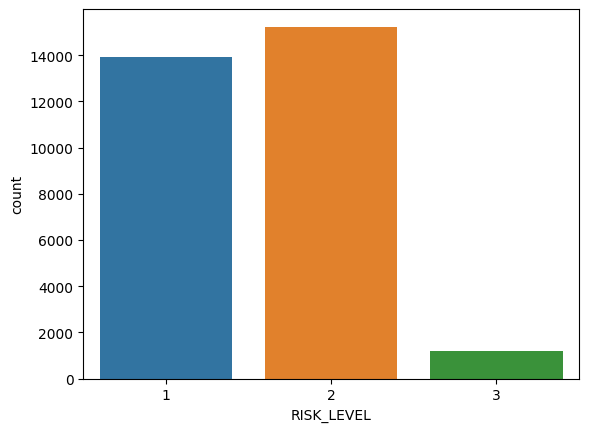

UsageError: Line magic function `%%skip` not found.


In [384]:
# Display the distribution of 'RISK_LEVEL'
sns.countplot(x='RISK_LEVEL', data=df)
plt.show()
%%skip
# More detailed exploration
sns.pairplot(df_transfered, hue='RISK_LEVEL')
plt.show()

In [385]:
#pipeline: choose obvious features from the above graph
cat_columns = ['AMT_INCOME_TOTAL','FLAG_OWN_REALTY','FLAG_OWN_CAR']
num_columns = ['AGE','WORK_YEAR','MONTHS_SCORE']
target= 'DEFAULT'

In [386]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [387]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.3, random_state=123)

In [388]:
# Transform the train and test data
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [389]:
x_train_transformed.shape

(21221, 10)

In [390]:
x_test_transformed.shape

(9095, 10)

In [391]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)) #encode categorical features, list tansfer..
all_feat = num_columns + encoded_columns #combine num and transfered categorical

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

Decision Tree

In [392]:
# Define class_names if not already defined
class_names = ['low_risk', 'medium_risk', 'high_risk']   # Replace with actual class names

# Create and fit the Decision Tree classifier
model = DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=1024)
model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred_tree = model.predict(X_test_transformed)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_tree)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)


In [393]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [394]:
print("DecisionTreeClassifier Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_tree))
print("Accuracy: ", accuracy_score(y_test, y_pred_tree))
print("F1_score: ", f1_score(y_test, y_pred_tree, average='macro'))
print("Precision: ", precision_score(y_test, y_pred_tree, average='macro'))
print("Recall: ", recall_score(y_test, y_pred_tree, average='macro'))

DecisionTreeClassifier Metrics: 
Confusion Matrix:  [[9043    0]
 [  52    0]]
Accuracy:  0.994282572842221
F1_score:  0.4985665453743522
Precision:  0.4971412864211105
Recall:  0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [395]:
# Hyperparameter tuning
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan','minkowski','chebyshev']}

# Define the models
knn = KNeighborsClassifier()

# Define GridSearchCV, RandomizedSearchCV
gridsearch_knn = GridSearchCV(knn, params_knn, cv=5, scoring='accuracy') #for the risk analysis, accuracy is better
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=5, n_iter = 10, scoring='accuracy') 

# Fit models
gridsearch_knn.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters!
print("Best parameters for gridsearch_knn: ", gridsearch_knn.best_params_)
print("Best parameters for randomsearch_knn: ", randomsearch_knn.best_params_)

KeyboardInterrupt: 

In [ ]:
# Apply the best parameters
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
y_pred_knn = knn_best.predict(X_test_transformed)

Cross-validation scores for KNN:  [0.99376114 0.99376114 0.99464764 0.99464764 0.99375558]


In [ ]:
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("F1_score: ", f1_score(y_test, y_pred_knn, average='macro'))
print("Precision: ", precision_score(y_test, y_pred_knn, average='macro'))
print("Recall: ", recall_score(y_test, y_pred_knn, average='macro'))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[2383    0]
 [  20    0]]
Accuracy:  0.9916770703287557
F1_score:  0.49791057250313414
Precision:  0.49583853516437787
Recall:  0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Navie Bayes

In [ ]:
# Create the model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gnb)

In [ ]:
print("GaussianNB Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_gnb))
print("Accuracy: ", accuracy_score(y_test, y_pred_gnb))
print("F1_score: ", f1_score(y_test, y_pred_gnb, average='macro'))
print("Precision: ", precision_score(y_test, y_pred_gnb, average='macro'))
print("Recall: ", recall_score(y_test, y_pred_gnb, average='macro'))

GaussianNB Metrics: 
Confusion Matrix:  [[2383    0]
 [  20    0]]
Accuracy:  0.9916770703287557
F1_score:  0.49791057250313414
Precision:  0.49583853516437787
Recall:  0.5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For this case, we choose Parameter: Recall to compare models, since we want to seize evry person with high risk and don't want to approve new higher level card for them
The Recall Score of decision Tree is the highest: 0.8476736075890324
According to the Confusion Matrix, Decision Tree predict make some higher prediction on riskevel1,and 2 but only a small number, which could be accepted
and the prediction of reisk level 3 is much accurate than others

Prediction/Interpretation Decision Tree

Show decision tree

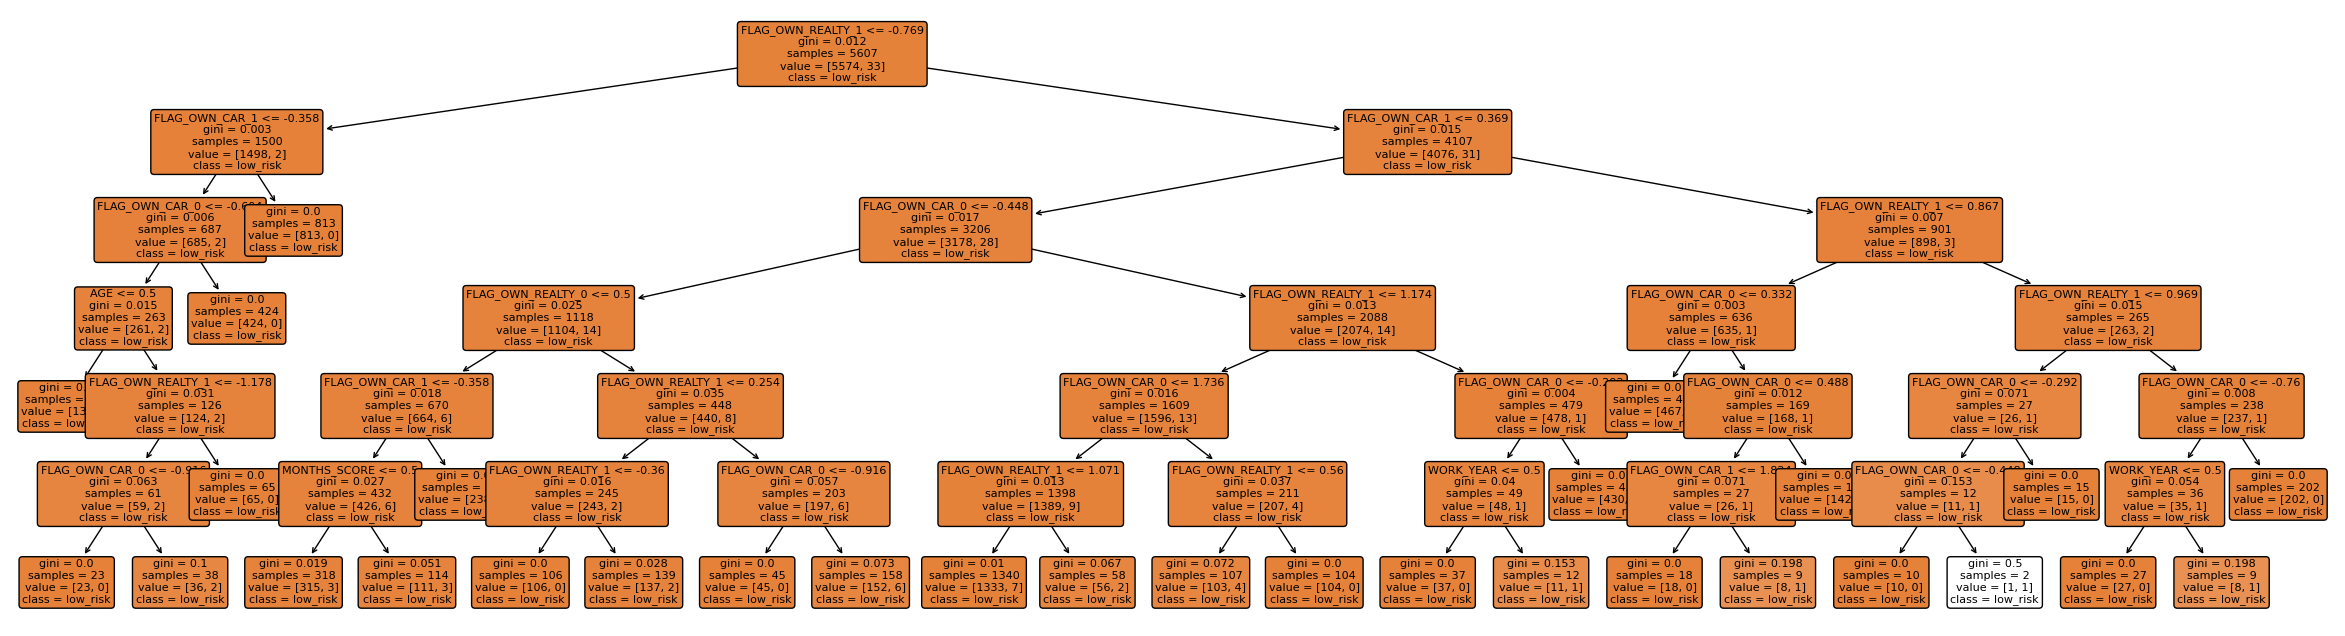

In [ ]:
# Increase the figure size and font size for better readability
plt.figure(figsize=(30, 8))  
plot_tree(model, feature_names=all_feat, class_names=class_names, filled=True, rounded=True, fontsize=8) 

# Save the plot to a file for better visualization
plt.savefig("decision_tree_plot.png", bbox_inches='tight') 

# Show the plot
plt.show()

It seems if owned a car is the first level node, then will be if one owned a real estate, then the age  and income level

show feature importance

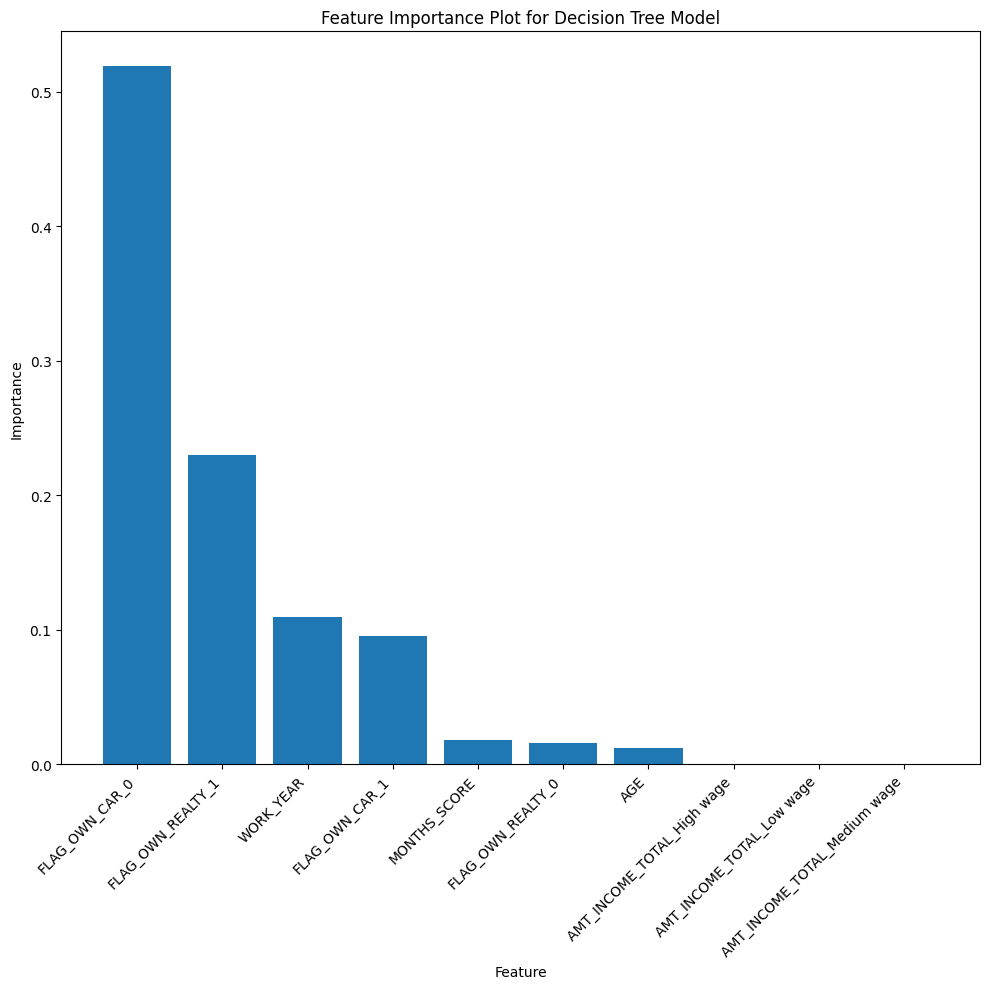

In [ ]:
# Get feature importances from the trained Decision Tree model
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': all_feat, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot for Decision Tree Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

If the client owned a car is the most important feature influence the model, then will be if he or she owned a real estate

To better interpret the model, do EDA to see the relations

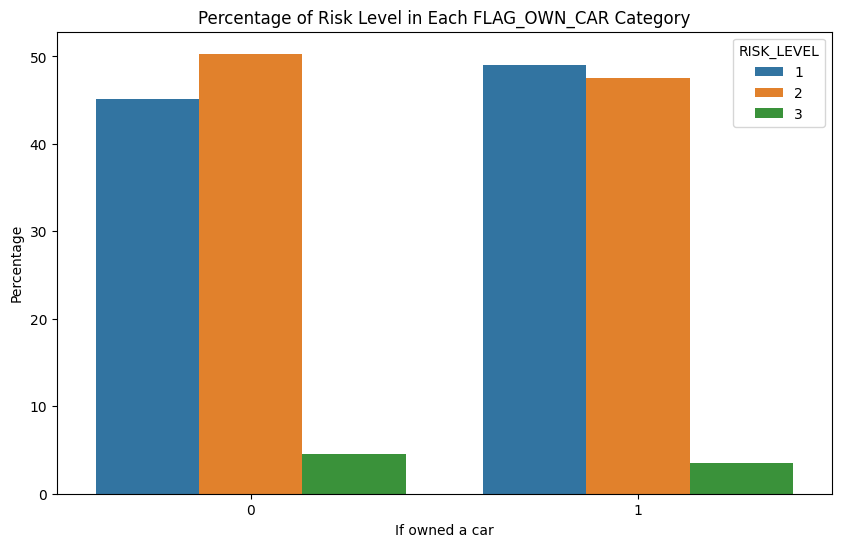

In [ ]:
#seems if not owned a car are more likely in risk level 2 and 3 then owned a car, if owned a car are more likely in risk level 1
plt.figure(figsize=(10, 6))

# Group the data by "FLAG_OWN_CAR" and "RISK_LEVEL" and count the occurrences
df_grouped_car = df.groupby(["FLAG_OWN_CAR", "RISK_LEVEL"], as_index=False).size()

# Rename the count column for clarity
df_grouped_car = df_grouped_car.rename(columns={"size": "count"})

# Calculate the total count for each FLAG_OWN_CAR category
df_total_count = df_grouped_car.groupby("FLAG_OWN_CAR")["count"].sum().reset_index()

# Merge the total count back to the grouped data
df_grouped_car = df_grouped_car.merge(df_total_count, on="FLAG_OWN_CAR", suffixes=('', '_total'))

# Calculate the percentage of each risk level in each FLAG_OWN_CAR category
df_grouped_car['percentage'] = (df_grouped_car['count'] / df_grouped_car['count_total']) * 100

# Plot the bar plot
sns.barplot(data=df_grouped_car, x="FLAG_OWN_CAR", y="percentage", hue="RISK_LEVEL")

plt.title('Percentage of Risk Level in Each FLAG_OWN_CAR Category')
plt.xlabel('If owned a car')
plt.ylabel('Percentage')
plt.show()


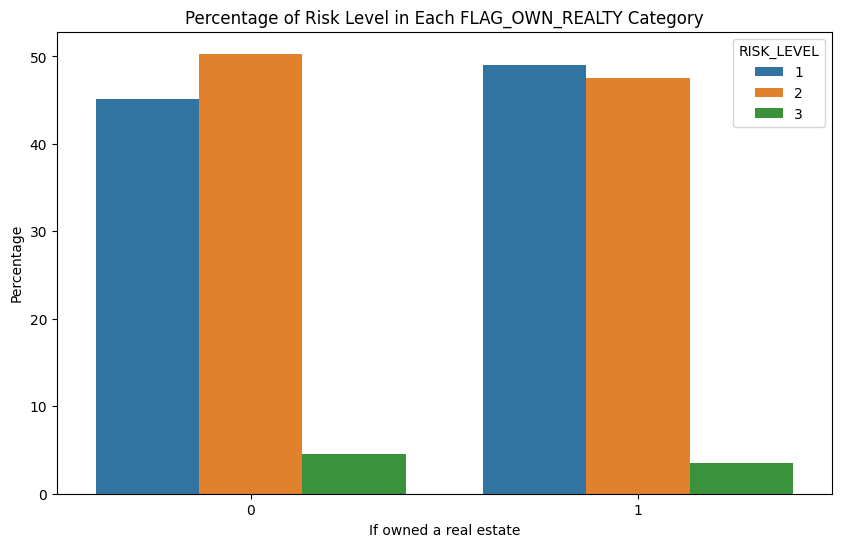

In [ ]:
#seems if not owned a real esate are more likely in risk level 2 and 3 then owned a car, if owned a real esate are more likely in risk level 1
plt.figure(figsize=(10, 6))

# Group the data by "FLAG_OWN_REALTY" and "RISK_LEVEL" and count the occurrences
df_grouped_real = df.groupby(["FLAG_OWN_REALTY", "RISK_LEVEL"], as_index=False).size()

# Rename the count column for clarity
df_grouped_real = df_grouped_real.rename(columns={"size": "count"})

# Calculate the total count for each FLAG_OWN_REALTY category
df_total_count = df_grouped_real.groupby("FLAG_OWN_REALTY")["count"].sum().reset_index()

# Merge the total count back to the grouped data
df_grouped_real = df_grouped_real.merge(df_total_count, on="FLAG_OWN_REALTY", suffixes=('', '_total'))

# Calculate the percentage of each risk level in each FLAG_OWN_REALTY category
df_grouped_real['percentage'] = (df_grouped_real['count'] / df_grouped_real['count_total']) * 100

# Plot the bar plot
sns.barplot(data=df_grouped_real, x="FLAG_OWN_REALTY", y="percentage", hue="RISK_LEVEL")

plt.title('Percentage of Risk Level in Each FLAG_OWN_REALTY Category')
plt.xlabel('If owned a real estate')
plt.ylabel('Percentage')
plt.show()

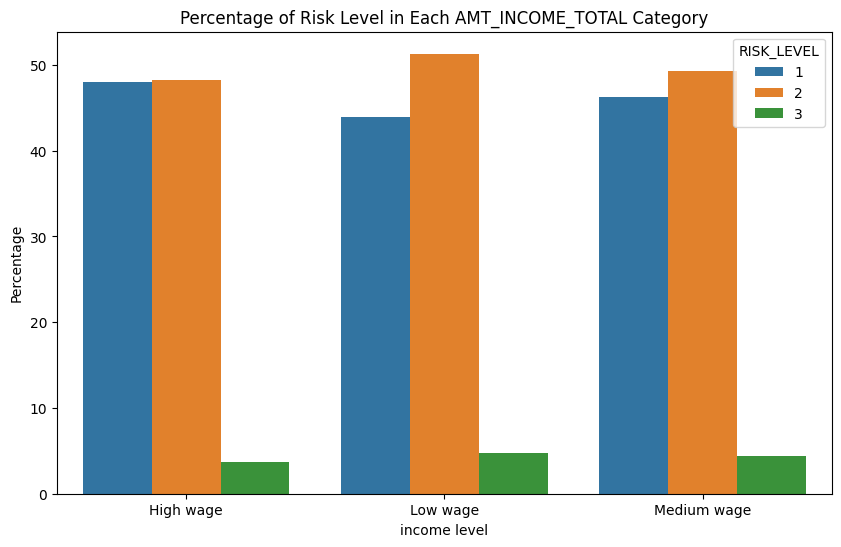

In [ ]:
#seems low income more likely to be in level2,3, high income more likely in level1,
plt.figure(figsize=(10, 6))

# Group the data by "AMT_INCOME_TOTAL" and "RISK_LEVEL" and count the occurrences
df_grouped_income = df.groupby(["AMT_INCOME_TOTAL", "RISK_LEVEL"], as_index=False).size()

# Rename the count column for clarity
df_grouped_income = df_grouped_income.rename(columns={"size": "count"})

# Calculate the total count for each AMT_INCOME_TOTAL category
df_total_count = df_grouped_income.groupby("AMT_INCOME_TOTAL")["count"].sum().reset_index()

# Merge the total count back to the grouped data
df_grouped_income = df_grouped_income.merge(df_total_count, on="AMT_INCOME_TOTAL", suffixes=('', '_total'))

# Calculate the percentage of each risk level in each AMT_INCOME_TOTAL category
df_grouped_income['percentage'] = (df_grouped_income['count'] / df_grouped_income['count_total']) * 100

# Plot the bar plot
sns.barplot(data=df_grouped_income, x="AMT_INCOME_TOTAL", y="percentage", hue="RISK_LEVEL")

plt.title('Percentage of Risk Level in Each AMT_INCOME_TOTAL Category')
plt.xlabel('income level')
plt.ylabel('Percentage')
plt.show()

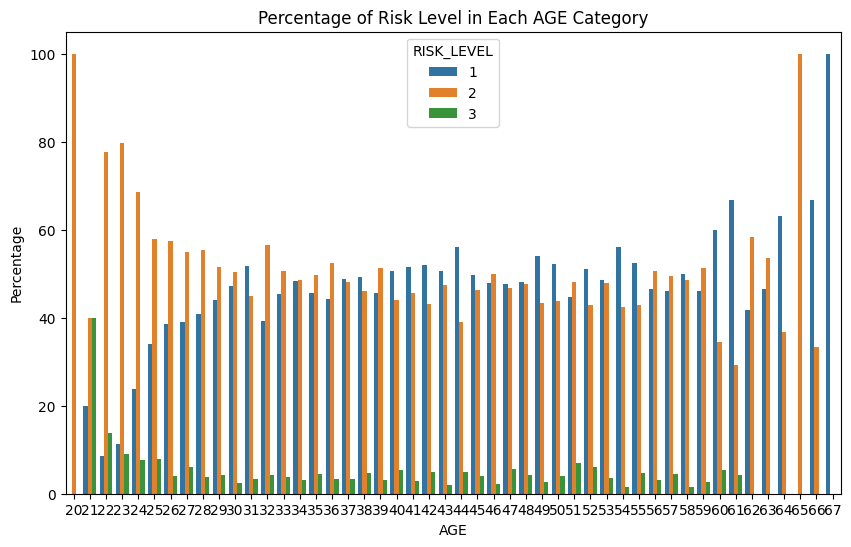

In [ ]:
#seems age blow 30 high potential to be inn level 3, old above 60 are more reliable
plt.figure(figsize=(10, 6))

# Group the data by "AGE" and "RISK_LEVEL" and count the occurrences
df_grouped_AGE = df.groupby(["AGE", "RISK_LEVEL"], as_index=False).size()

# Rename the count column for clarity
df_grouped_AGE = df_grouped_AGE.rename(columns={"size": "count"})

# Calculate the total count for each AGEcategory
df_total_count = df_grouped_AGE.groupby("AGE")["count"].sum().reset_index()

# Merge the total count back to the grouped data
df_grouped_AGE = df_grouped_AGE.merge(df_total_count, on="AGE", suffixes=('', '_total'))

# Calculate the percentage of each risk level in each AMT_INCOME_TOTAL category
df_grouped_AGE['percentage'] = (df_grouped_AGE['count'] / df_grouped_AGE['count_total']) * 100

# Plot the bar plot
sns.barplot(data=df_grouped_AGE, x="AGE", y="percentage", hue="RISK_LEVEL")

plt.title('Percentage of Risk Level in Each AGE Category')
plt.xlabel('AGE')
plt.ylabel('Percentage')
plt.show()

Conclusion:
This project is using the model to predict client risk level, to help decide if approve the current client with a higher level credit card, and which level card.
Use overdue status and month recored define the risk level, higher the level, more likely to reject the client to get a higher level credit card
The Decision Tree model predicted best, we choose recall score in order to avoid the risky client get a higher level credit card, which may lead to loss for the company
Through the interpretation of the model, if a client owned a car is the first decision factor, then will be if one owned a real esate, then will be his or her age and income level
Using this model could provid the prediction of 
accuracy: 0.8818797629127858
F1_score:  0.8581157271878922
Precision:  0.8737073773132961
Recall:  0.8476736075890324
We recommend to reject the client risk level 3 upgrade requirement, approve risk level 2 client with credit card level below silver; approve risk level 1 clients with credit card level above silver.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8010 entries, 5008804 to 5150337
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          8010 non-null   object 
 1   FLAG_OWN_CAR         8010 non-null   object 
 2   FLAG_OWN_REALTY      8010 non-null   object 
 3   CNT_CHILDREN         8010 non-null   int64  
 4   AMT_INCOME_TOTAL     8010 non-null   object 
 5   NAME_INCOME_TYPE     8010 non-null   object 
 6   NAME_EDUCATION_TYPE  8010 non-null   object 
 7   NAME_FAMILY_STATUS   8010 non-null   object 
 8   NAME_HOUSING_TYPE    8010 non-null   object 
 9   FLAG_MOBIL           8010 non-null   int64  
 10  FLAG_WORK_PHONE      8010 non-null   int64  
 11  FLAG_PHONE           8010 non-null   int64  
 12  FLAG_EMAIL           8010 non-null   int64  
 13  OCCUPATION_TYPE      8010 non-null   object 
 14  CNT_FAM_MEMBERS      8010 non-null   float64
 15  MONTHS_BALANCE       8010 non-null

In [ ]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,...,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,MONTHS_SCORE,STATUS_SCORE,TOTAL_SCORE,DEFAULT,AGE,WORK_YEAR,RISK_LEVEL
ID,,,,,,,,,,,,,,,,,,,,,
5008804,0,1,1,0,High wage,Working,Higher education,Civil marriage,Rented apartment,1,...,2.0,15,1,2,2,2.0,0,32,12,2
5008806,0,1,1,0,Low wage,Working,Secondary / secondary special,Married,House / apartment,1,...,2.0,29,0,1,1,1.0,0,58,3,1
5008808,1,0,0,0,High wage,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,...,1.0,4,0,5,1,3.0,0,52,8,2
5008815,0,1,1,0,High wage,Working,Higher education,Married,House / apartment,1,...,2.0,5,0,4,1,2.5,0,46,2,2
5008819,0,1,1,0,Medium wage,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,2.0,17,-1,2,0,1.0,0,48,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148694,1,0,0,0,High wage,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,1,...,2.0,20,2,2,3,2.5,0,56,0,2
5149055,1,0,0,0,Low wage,Commercial associate,Secondary / secondary special,Married,House / apartment,1,...,2.0,19,2,2,3,2.5,0,43,7,2
5149729,0,1,1,0,Low wage,Working,Secondary / secondary special,Married,House / apartment,1,...,2.0,21,2,2,3,2.5,0,52,4,2


In [ ]:
results = ols("STATUS ~ RISK_LEVEL", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 STATUS   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1373.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.73e-277
Time:                        13:55:58   Log-Likelihood:                -7738.1
No. Observations:                8010   AIC:                         1.548e+04
Df Residuals:                    8008   BIC:                         1.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6586      0.021    -31.645      0.0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your DataFrame is named DF, and you have already preprocessed it.

# Step 1: Prepare the Data
X = df[['RISK_LEVEL']]  # Predictor variable
y = (df['DEFAULT']).astype(int)  # Target variable; convert to binary labels (0 for not 5, 1 for 5)

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose and Train the Model (Logistic Regression)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (STATUS = 5)

# Evaluate the model
accuracy = accuracy_score(y_test, model.predict(X_test))
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.99
ROC AUC: 0.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Assuming your DataFrame is named DF, and you have already preprocessed it.

# Step 1: Prepare the Data
X = df[['RISK_LEVEL']]  # Predictor variable
y = df['DEFAULT']  # Target variable (categorical)

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Choose and Train the Model (Gradient Boosting Classifier)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions and Predict Probabilities
y_pred = model.predict(X_test)  # Predicted class labels
y_pred_prob = model.predict_proba(X_test)  # Probabilities for each class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])  # Probability of class 1 (STATUS = 5)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


Accuracy: 0.99
ROC AUC: 0.99


In [ ]:
df['RISK_LEVEL'].describe()


count    8010.000000
mean        1.575031
std         0.572108
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: RISK_LEVEL, dtype: float64

In [ ]:
df['TOTAL_SCORE'].describe()

count    8010.000000
mean        1.528964
std         0.742068
min         0.500000
25%         1.000000
50%         1.500000
75%         2.000000
max         5.500000
Name: TOTAL_SCORE, dtype: float64

In [ ]:
df_risk = df.groupby(['RISK_LEVEL', 'DEFAULT'])

In [ ]:
df_score = df.groupby(['TOTAL_SCORE', 'DEFAULT', 'STATUS'])

In [ ]:
df_score = df_score.size().reset_index(name='COUNT')

In [ ]:
df_score['TOTAL_COUNT'] = df_score.groupby('TOTAL_SCORE')['COUNT'].transform('sum')

In [ ]:
df_score['PERCENT_OF_COUNT'] = (df_score['COUNT']/df_score['TOTAL_COUNT']*100).astype(float).round(2)

In [ ]:
df_score

,TOTAL_SCORE,DEFAULT,STATUS,COUNT,TOTAL_COUNT,PERCENT_OF_COUNT
0,0.5,0,-1,466,466,100.00
1,1.0,0,-1,198,3270,6.06
2,1.0,0,0,3072,3270,93.94
3,1.5,0,-1,72,2054,3.51
4,1.5,0,0,1452,2054,70.69
5,1.5,0,1,530,2054,25.80
6,2.0,0,-1,75,840,8.93
7,2.0,0,0,473,840,56.31
8,2.0,0,1,242,840,28.81
9,2.0,0,2,50,840,5.95


<Axes: xlabel='TOTAL_SCORE', ylabel='PERCENT_OF_COUNT'>

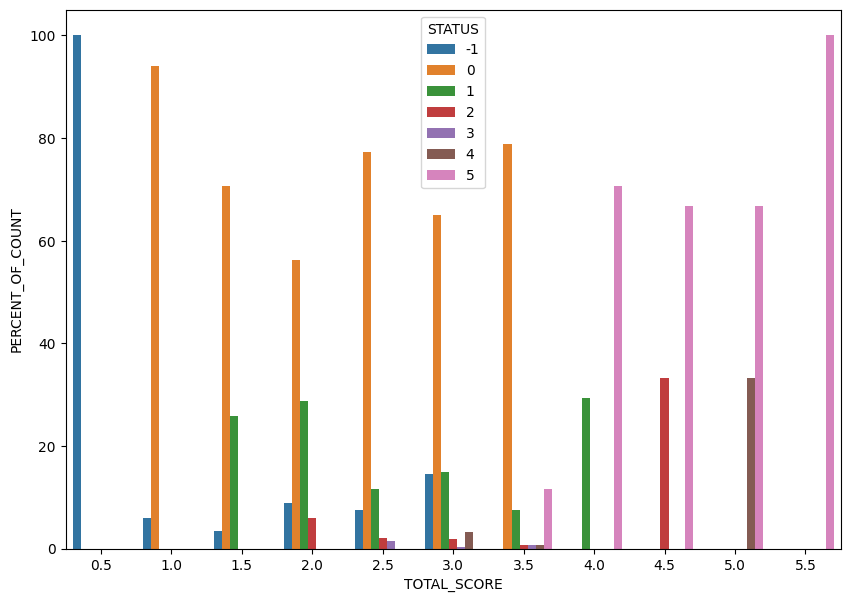

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x= 'TOTAL_SCORE', y='PERCENT_OF_COUNT', hue='STATUS', data= df_score)

In [ ]:
df_score.describe()

,TOTAL_SCORE,DEFAULT,STATUS,COUNT,TOTAL_COUNT,PERCENT_OF_COUNT
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.911765,0.147059,1.647059,235.588235,706.735294,32.352941
std,1.208998,0.359491,2.057983,574.772583,849.226326,33.615807
min,0.500000,0.000000,-1.000000,1.000000,1.000000,0.270000
25%,2.000000,0.000000,0.000000,2.750000,308.000000,4.120000
50%,3.000000,0.000000,1.000000,43.000000,366.000000,14.755000
75%,3.500000,0.000000,3.000000,228.000000,800.500000,66.260000
max,5.500000,1.000000,5.000000,3072.000000,3270.000000,100.000000


In [ ]:
df_risk

In [ ]:
#pipeline: choose obvious features from the above graph
cat_columns = ['RISK_LEVEL']
target= 'DEFAULT'
#target = 'RISK_LEVEL'

In [ ]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])